In [345]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

In [346]:
train = pd.read_csv("C:/Users/Timan/Desktop/titanic/train.csv")
test = pd.read_csv("C:/Users/Timan/Desktop/titanic/test.csv")
submit = pd.read_csv("C:/Users/Timan/Desktop/titanic/gender_submission.csv")

In [347]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [348]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [349]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [350]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [351]:
data = train.append(test)

In [352]:
data.reset_index(drop = True, inplace = True)
data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [353]:
data.describe(include = ['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,295,1307,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Connolly, Miss. Kate",male,CA. 2343
freq,6,914,2,843,11


,Survived
Sex,
female,0.7420
male,0.1889


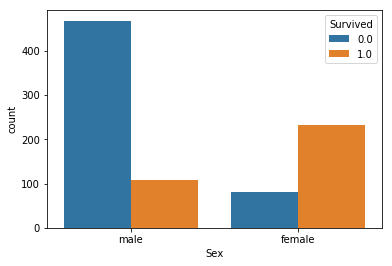

In [354]:
sns.countplot(data['Sex'], hue = data['Survived'])
display(data[['Sex', 'Survived']].groupby(['Sex']).mean().round(4))

,Pclass
Survived,
0.0,2.5319
1.0,1.9503


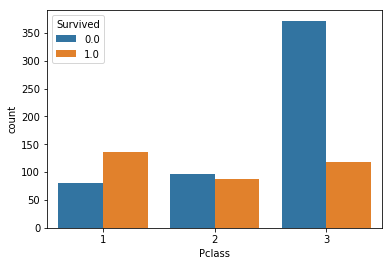

In [355]:
sns.countplot(data['Pclass'], hue = data['Survived'])
display(data[['Pclass', 'Survived']].groupby(['Survived']).mean().round(4))

,Survived
Embarked,
C,0.5536
Q,0.3896
S,0.3370


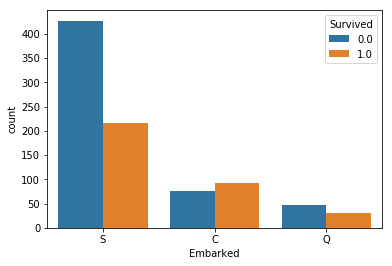

In [356]:
sns.countplot(data['Embarked'], hue = data['Survived'])
display(data[["Embarked", "Survived"]].groupby(['Embarked']).mean().round(4))

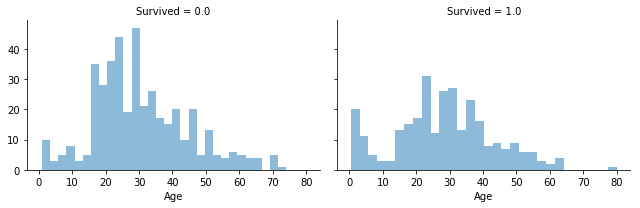

In [357]:
g = sns.FacetGrid(data, col = 'Survived', aspect = 1.5)
g.map(plt.hist, 'Age', alpha = 0.5, bins = 30)

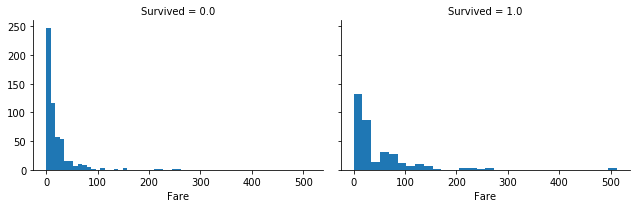

In [358]:
g = sns.FacetGrid(data, col = 'Survived', aspect = 1.5)
g.map(plt.hist, 'Fare', bins = 30)

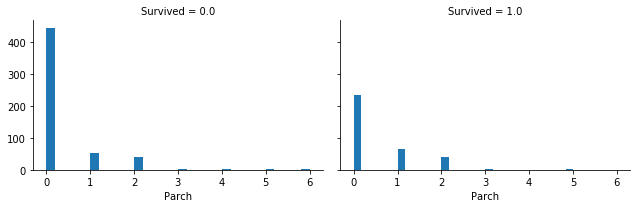

In [359]:
g = sns.FacetGrid(data, col = 'Survived', aspect = 1.5)
g.map(plt.hist, 'Parch', bins = 30)

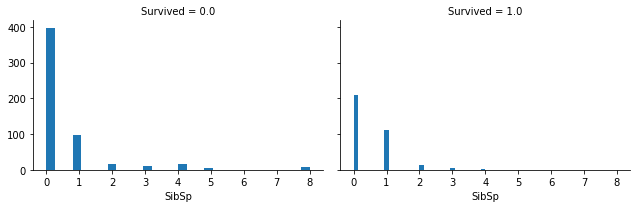

In [360]:
g = sns.FacetGrid(data, col = 'Survived', aspect = 1.5)
g.map(plt.hist, 'SibSp', bins = 30)

In [361]:
data['Sex'] = data['Sex'].map({'male' : 0, 'female' : 1}).astype(int)

In [362]:
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.')

pd.crosstab(data['Title'], data['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [363]:
data['Title'] = data['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer',\
                                      'Lady', 'Major', 'Rev', 'Sir', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace(['Mlle', 'Ms'], 'Miss')
data['Title'] = data['Title'].replace(['Mlle', 'Mme'], 'Mrs')


data[['Title', 'Survived']].groupby(['Title']).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [364]:
data['Title'] = data['Title'].map({"Mr" : 0, "Miss" : 1, "Mrs" : 2, "Master" : 3, "Rare" : 4})
data.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,2
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,2
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,0


In [365]:
for dataset in data:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = data[(data['Sex'] == i) & (data['Pclass'] == j+1)]['Age'].dropna()


            age_guess = guess_df.median()

            
    for i in range(0, 2):
        for j in range(0, 3):
            data.loc[ (data.Age.isnull()) & (data.Sex == i) & (data.Pclass == j+1), 'Age'] = age_guess
            
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int32
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null int64
dtypes: float64(3), int32(1), int64(5), object(4)
memory usage: 127.9+ KB


In [366]:
data.loc[data['Age'] < 18, 'Age'] = 0
data.loc[(data['Age'] >= 18) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
data.loc[data['Age'] > 64, 'Age'] = 4
data.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,1.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,0
1,2.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,2
2,1.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,1
3,2.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,2
4,2.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,0


In [367]:
data[['Age', 'Survived']].groupby(['Age'], as_index = False).mean().sort_values(by = 'Age', ascending = True)

,Age,Survived
0,0.0,0.539823
1,1.0,0.341176
2,2.0,0.404255
3,3.0,0.434783
4,4.0,0.090909


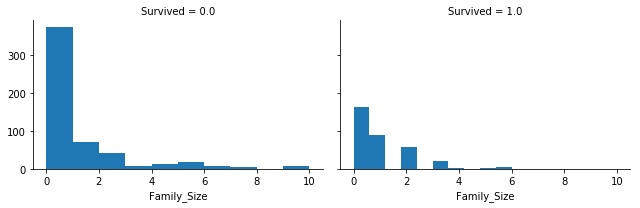

In [368]:
data['Family_Size'] = data['Parch'] + data['SibSp']
g = sns.FacetGrid(data, col = 'Survived', aspect = 1.5)
g.map(plt.hist, 'Family_Size')

In [369]:
data['Embarked'].mode()[0]

'S'

In [370]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending = False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [371]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [372]:
data['FareGroup'] = pd.qcut(data['Fare'], 4)
data[['FareGroup', 'Survived']].groupby(['FareGroup']).mean().sort_values(by='Survived', ascending = True)

,Survived
FareGroup,
"(-0.001, 7.896]",0.197309
"(7.896, 14.454]",0.303571
"(14.454, 31.275]",0.441048
"(31.275, 512.329]",0.600000


In [373]:
data.loc[data['Fare'] <= 7.896, 'Fare'] = 0
data.loc[(data['Fare'] > 7.896) & (data['Fare'] <= 14.454), 'Fare'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31.275), 'Fare'] = 2
data.loc[data['Fare'] > 31.275, 'Fare'] = 3

data['Fare'] = data['Fare'].astype(int)

data = data.drop(['FareGroup'], axis = 1)
data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,1.0,NaN,S,0,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,0,1
1,2.0,C85,C,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,2,1
2,1.0,NaN,S,1,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,1,0
3,2.0,C123,S,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,2,1
4,2.0,NaN,S,1,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,0,0
5,1.0,NaN,Q,1,"Moran, Mr. James",0,6,3,0,0,0.0,330877,0,0
6,3.0,E46,S,3,"McCarthy, Mr. Timothy J",0,7,1,0,0,0.0,17463,0,0
7,0.0,NaN,S,2,"Palsson, Master. Gosta Leonard",1,8,3,0,3,0.0,349909,3,4
8,1.0,NaN,S,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,1,0,1.0,347742,2,2
9,0.0,NaN,C,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,1,1,1.0,237736,2,1


In [374]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null int32
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int32
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null int64
Family_Size    1309 non-null int64
dtypes: float64(2), int32(2), int64(6), object(4)
memory usage: 133.0+ KB


In [375]:

data['Embarked'] = data['Embarked'].map({'S' : 0,'C' : 1,'Q' : 2}).astype(int)
data['Fare'] = data['Fare'].astype(int)

In [376]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,1.0,NaN,0,0,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,0,1
1,2.0,C85,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,2,1
2,1.0,NaN,0,1,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,1,0
3,2.0,C123,0,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,2,1
4,2.0,NaN,0,1,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,0,0


In [377]:
data.keys()

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title', 'Family_Size'],
      dtype='object')

In [378]:
data_train = data[pd.notnull(data['Survived'])].sort_values(by = ['PassengerId'])
data_test = data[~pd.notnull(data['Survived'])].sort_values(by = ['PassengerId'])

data_train.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title', 'Family_Size'],
      dtype='object')

In [389]:
data_train = data_train[['Survived', 'Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Title', 'Family_Size']]
data_test = data_test[['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Title', 'Family_Size']]

x_train = data_train.iloc[:, 1:]
y_train = data_train.iloc[:, 0]
x_test = data_test.iloc[:,:]

In [381]:
data_train.describe()
print('-'*40)
data_test.describe()

----------------------------------------


,Age,Embarked,Fare,Pclass,Sex,Title,Family_Size
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1.287081,0.464115,1.492823,2.265550,0.363636,0.741627,0.839713
std,0.779765,0.685516,1.148953,0.841838,0.481622,1.006091,1.519072
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000
max,4.000000,2.000000,3.000000,3.000000,1.000000,4.000000,10.000000


In [409]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
random_forest.score(x_train, y_train)

0.8911335578002245

In [410]:
from sklearn.model_selection import StratifiedKFold

In [411]:
pd.concat((pd.DataFrame(data_train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(random_forest.feature_importances_, columns = ['importance'])),
         axis = 1).sort_values(by = 'importance', ascending = False)

,variable,importance
5,Title,0.266815
4,Sex,0.188627
6,Family_Size,0.146083
3,Pclass,0.137897
2,Fare,0.111187
0,Age,0.097496
1,Embarked,0.051894


In [412]:
rf_predict = random_forest.predict(data_test)
